

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024<br>
<font color=3C99D size=5>
     Unsupervised Learning<br>
<font color=696880 size=4>
    

In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

## Overview
In this assignment, you will perform PCA and K-Means clustering on credit card customer data. dataset contains information about customer’s use of credit cards. The goal is to reduce the dataset’s dimensionality using PCA and then apply clustering to segment customers. You will compare the clustering performance both before and after PCA. Additionally, you'll be asked to explain the theory and decisions behind each step.

## Data Preprocessing
Read the dataset.CSV file and display a few samples.

In [ ]:
df = pd.read_csv('dataset.csv')

print(df.head())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

Display dataset information.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Which column do you think might be the most irrelevant for PCA and clustering?
<br>
Answer: ID because does not show any analyzing data and its just a unique identifier

In [ ]:
constant_columns = [col for col in df.columns if df[col].nunique() == 1]

id_columns = [col for col in df.columns if 'id' in col.lower()]
irrelevant_columns = constant_columns + id_columns
df = df.drop(columns=irrelevant_columns)
print(df.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

how do you handle missing data, and why did you choose this method?
<br>
Answer: fill missing data of each column with mean of that column these fill format won't add significant bias


In [ ]:
columns_with_null = df.columns[df.isnull().any()].tolist()
print("Columns with missing values:", columns_with_null)
for col in columns_with_null:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].mean(), inplace=True)

Columns with missing values: ['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']


<ipython-input-61-228a8e31eef5>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


plot the correlation matrix and identify redundant features.remove them from the dataframe.

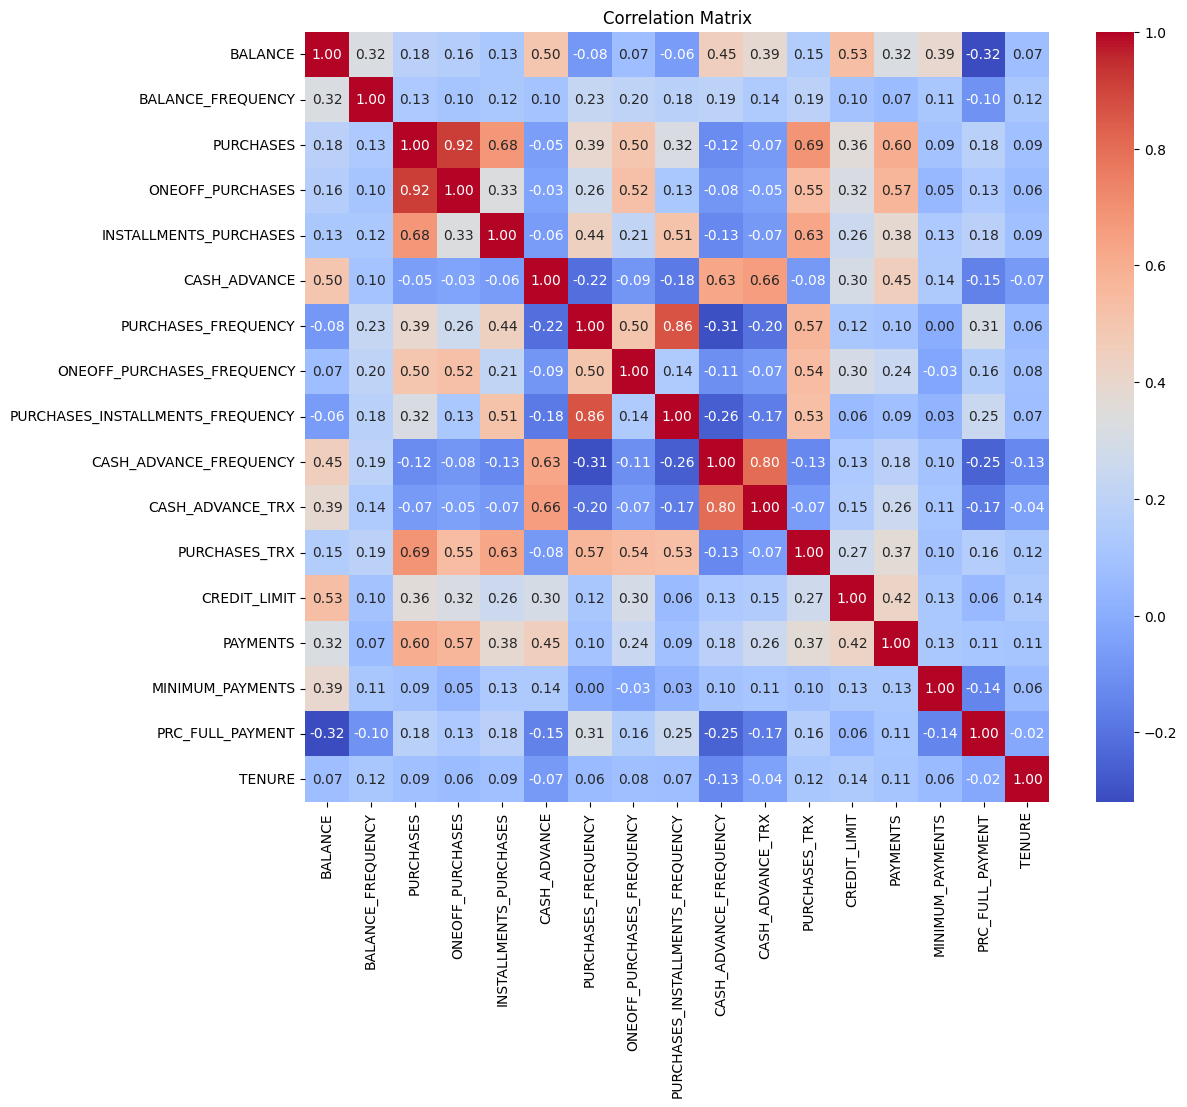

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
redundant_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
          redundant_features.add(correlation_matrix.columns[i])
print("Redundant features:", redundant_features)
df = df.drop(columns=redundant_features)

Redundant features: {'PURCHASES_INSTALLMENTS_FREQUENCY', 'ONEOFF_PURCHASES'}


## Standardize the Data
Standardize the dataset using z-score normalization

In [ ]:
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

Why is it important to standardize the data before applying PCA?
<br>
Answer: Standardizing the data before applying PCA ensures that all features contribute equally to the analysis, preventing bias from differing scales and magnitudes, and leading to more meaningful principal components.

What is differnce between Normalizer and StandardScaler classes. which is better for PCA?
<br>
Answer: The Normalizer scales individual samples to unit norm, while StandardScaler standardizes features to zero mean and unit variance; StandardScaler is better for PCA as it preserves variance across features.

## Principal Component Analysis (PCA)
Implement PCA from scratch.

In [ ]:
import numpy as np

class CustomPCA:
    def __init__(self, n_components=None):
        """
        Initialize the PCA class with the number of components to keep.
        n_components: Number of principal components to keep. If None, all components are kept.
        """
        self.n_components = n_components
        self.components = None  # To store the principal components (eigenvectors)
        self.mean = None        # To store the mean of the data (used for centering the data)
        self.explained_variance_ratio = None  # To store the explained variance ratio of the components

    def fit(self, X):
        """
        Fit the PCA model on the dataset X by calculating the eigenvalues and eigenvectors of the covariance matrix.
        X: Input data (n_samples, n_features)
        """
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        covariance_matrix = np.cov(X_centered, rowvar=False)

        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]

        if self.n_components:
            eigenvectors = eigenvectors[:, :self.n_components]
            eigenvalues = eigenvalues[:self.n_components]

        self.components = eigenvectors
        self.explained_variance_ratio = eigenvalues / eigenvalues.sum()


    def transform(self, X):
        """
        Transform the input data X into the new space using the principal components.
        X: Input data (n_samples, n_features)
        """
        X_centered = X - self.mean

        return np.dot(X_centered, self.components)

    def get_explained_variance_ratio(self):
        """
        Return the explained variance ratio of each principal component.
        """
        return self.explained_variance_ratio

    def get_components(self):
        """
        Return the principal components (eigenvectors).
        """
        return self.components

### Visualizing the Cumulative Variance

Plot the cumulative explained variance to visualize the selection of components.  How many components are needed to explain 75% of the variance?
<br>
answer: 6

[ 25.4  47.6  56.3  63.9  70.5  76.1  81.4  85.8  89.5  92.6  94.6  96.3
  97.8  99.  100. ]


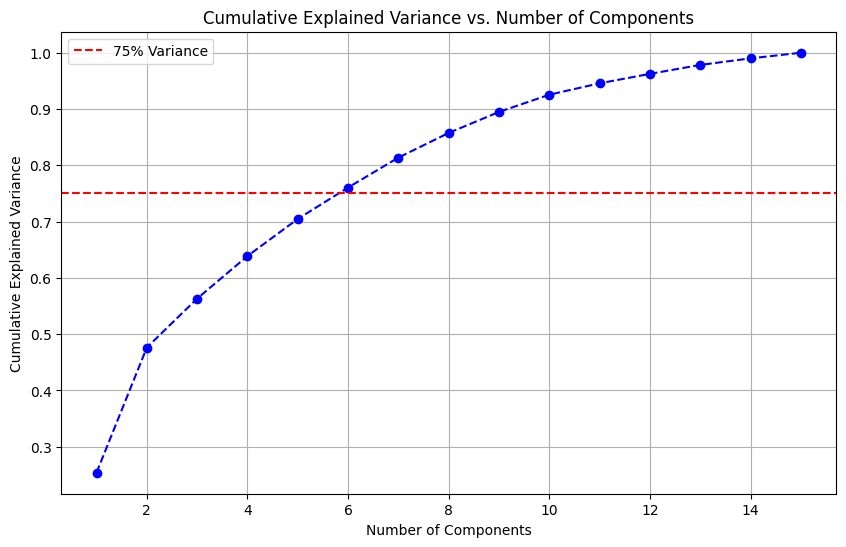

Number of components needed to explain 75% of the variance: 6


In [ ]:
pca = CustomPCA(n_components=None)
pca.fit(df)

cumulative_variance = np.cumsum(pca.get_explained_variance_ratio())
print((cumulative_variance*100).round(1))
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.axhline(y=0.75, color='r', linestyle='--', label='75% Variance')
plt.legend()
plt.grid()
plt.show()

n_components_75 = np.argmax(cumulative_variance >= 0.75) + 1
print(f"Number of components needed to explain 75% of the variance: {n_components_75}")

Build a new DataFrame with the first slected components. save it to a new CSV file named 'pca_output.csv'

In [ ]:
X_transformed = pca.transform(df)[:, :5]

pca_df = pd.DataFrame(X_transformed, columns=[f'PC{i+1}' for i in range(X_transformed.shape[1])])
pca_df.to_csv('pca_output.csv', index=False)

print(pca_df.head())

        PC1       PC2       PC3       PC4       PC5
0  1.728541  0.833445 -0.384363 -0.429897 -0.118070
1  0.312835 -2.531537  0.615274 -0.912451 -0.845063
2 -1.197318  0.883804 -1.177909  1.172951 -1.072885
3  0.904752 -0.002158 -0.236403 -1.354837 -0.441498
4  1.498611  0.526780 -0.787691 -0.088656 -0.275036


We expect these new features to be orthogonal to each other. Check this and show the correlation between the features.

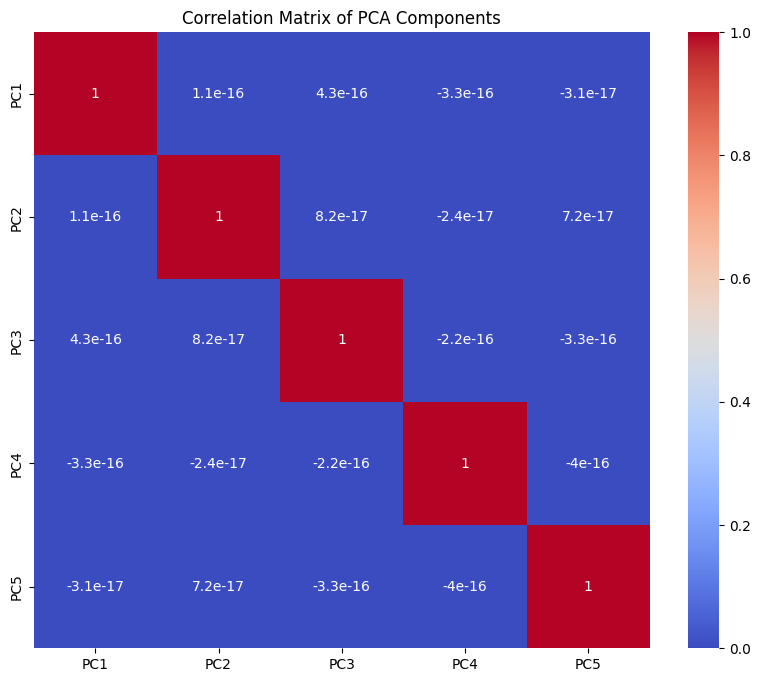

In [ ]:
correlation_matrix = pca_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Matrix of PCA Components")
plt.show()

## KMeans
Implement kmeans from scratch.

In [ ]:
import numpy as np

class CustomKMeans:
    def __init__(self, n_clusters=3, max_iter=100, random_state=42):
        """
        Initialize the KMeans class with the number of clusters and maximum iterations.
        n_clusters: Number of clusters to form.
        max_iter: Maximum number of iterations for convergence.
        random_state: Seed for reproducibility.
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.centroids = None  # To store the centroids of clusters
        self.inertia_ = None   # To store the inertia (within-cluster sum of squares)
        self.labels_ = None    # To store the label assigned to each data point (cluster assignment)

    def fit(self, X):
        """
        Fit the KMeans model on the dataset X.
        X: Input data (n_samples, n_features)
        """
        np.random.seed(self.random_state)
        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[random_indices]

        for i in range(self.max_iter):
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            self.labels_ = np.argmin(distances, axis=1)

            new_centroids = np.array([X[self.labels_ == j].mean(axis=0) for j in range(self.n_clusters)])

            if np.allclose(self.centroids, new_centroids):
                break
            self.centroids = new_centroids

        self.inertia_ = self._calculate_inertia(X)

        return self

    def _calculate_inertia(self, X):
        """
        Calculate the within-cluster sum of squared distances (inertia).
        X: Input data (n_samples, n_features)
        Returns: inertia (float)
        """
        distances = np.linalg.norm(X - self.centroids[self.labels_], axis=1) ** 2
        return distances.sum()


### Elbow Method
Apply the elbow method to determine the optimal number of clusters for K-Means. what is the best number of clusters?

In [ ]:
WCSS = []

for i in range(1, 30):
    kmeans_pca = CustomKMeans(n_clusters=i, random_state=42)

    kmeans_pca.fit(X_transformed)
    WCSS.append(kmeans_pca.inertia_)

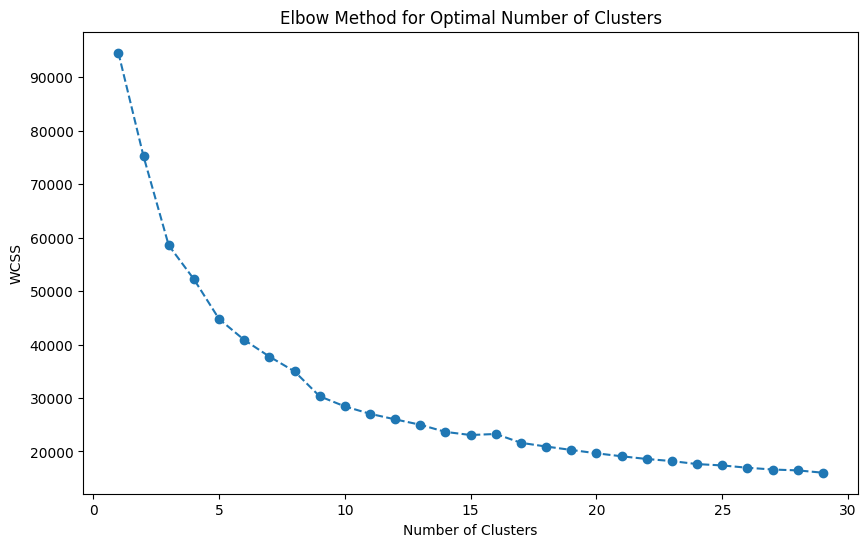

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), WCSS, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

Apply the optimal KMeans clustering on the PCA-transformed data, and assign cluster labels to each observation. Add a new column named segment to the df_pca DataFrame to store these labels.

In [ ]:
optimal_clusters = 5
kmeans_optimal = CustomKMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_optimal.fit(pca_df.values)
labels = kmeans_optimal.labels_
centroids = kmeans_optimal.centroids

In [ ]:
pca_df['segment'] = labels

 visualize the clustering by plotting the pairwise relationships of the PCA-reduced features, color-coded by the cluster assignments.

<Figure size 1200x1000 with 0 Axes>

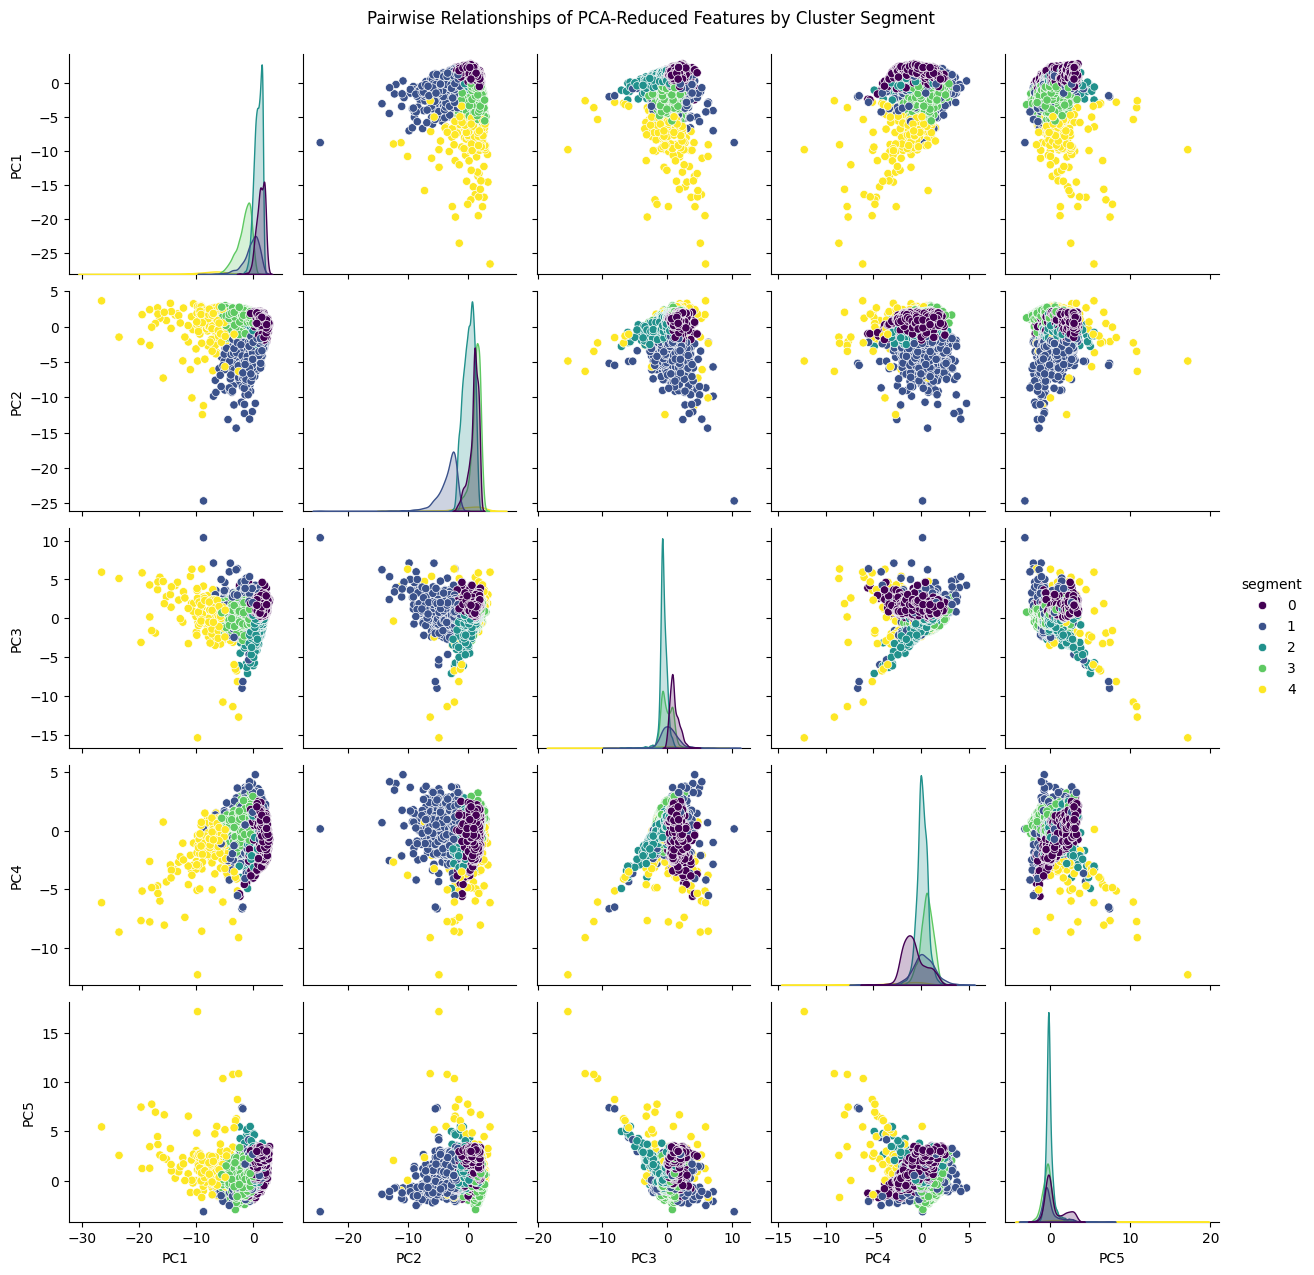

In [ ]:
plt.figure(figsize=(12, 10))
sns.pairplot(pca_df, hue='segment', palette='viridis', markers='o', diag_kind='kde', height=2.5)
plt.suptitle('Pairwise Relationships of PCA-Reduced Features by Cluster Segment', y=1.02)
plt.show()

So, when we employ PCA prior to using K-means we can visually separate almost the entire data set. That was one of the biggest goals of PCA - to reduce the number of variables by combining them into bigger, more meaningful features.

### Hierarchical Clustering
Perform hierarchical clustering on the reduced dataset after PCA. Use complete linkage method.


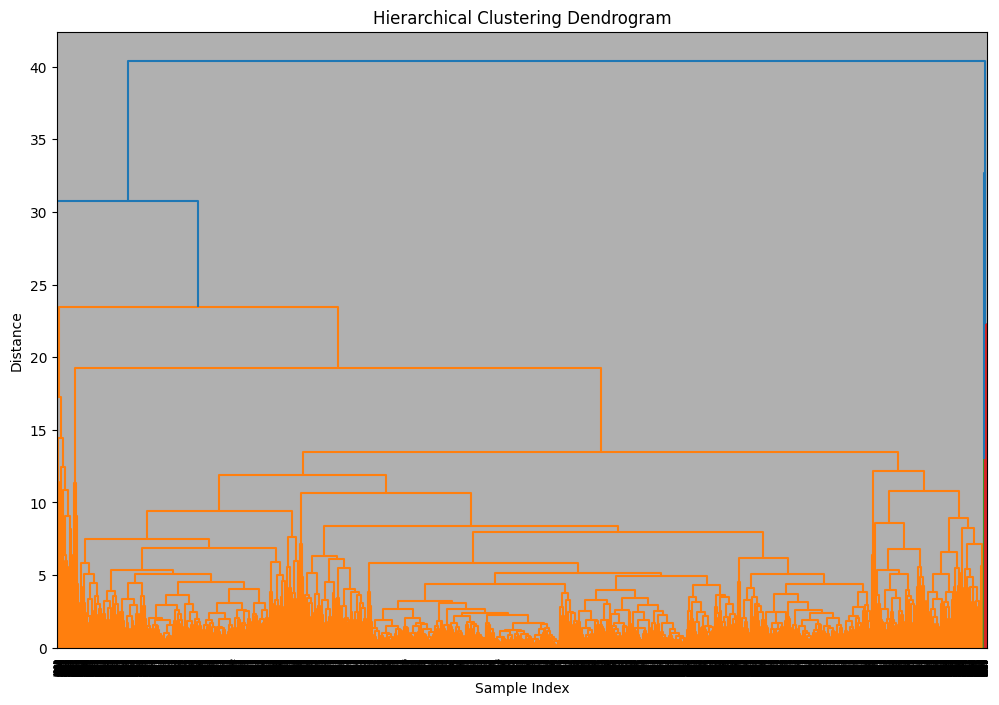

In [ ]:
linked = linkage(pca_df.values, method='complete')
plt.figure(figsize=(12, 8))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.grid()
plt.show()

"Use scipy.cluster.hierarchy.fcluster to assign clusters from the dendrogram with a specified number of 5 clusters. Then visualize the results using pairplots.

<Figure size 1200x1000 with 0 Axes>

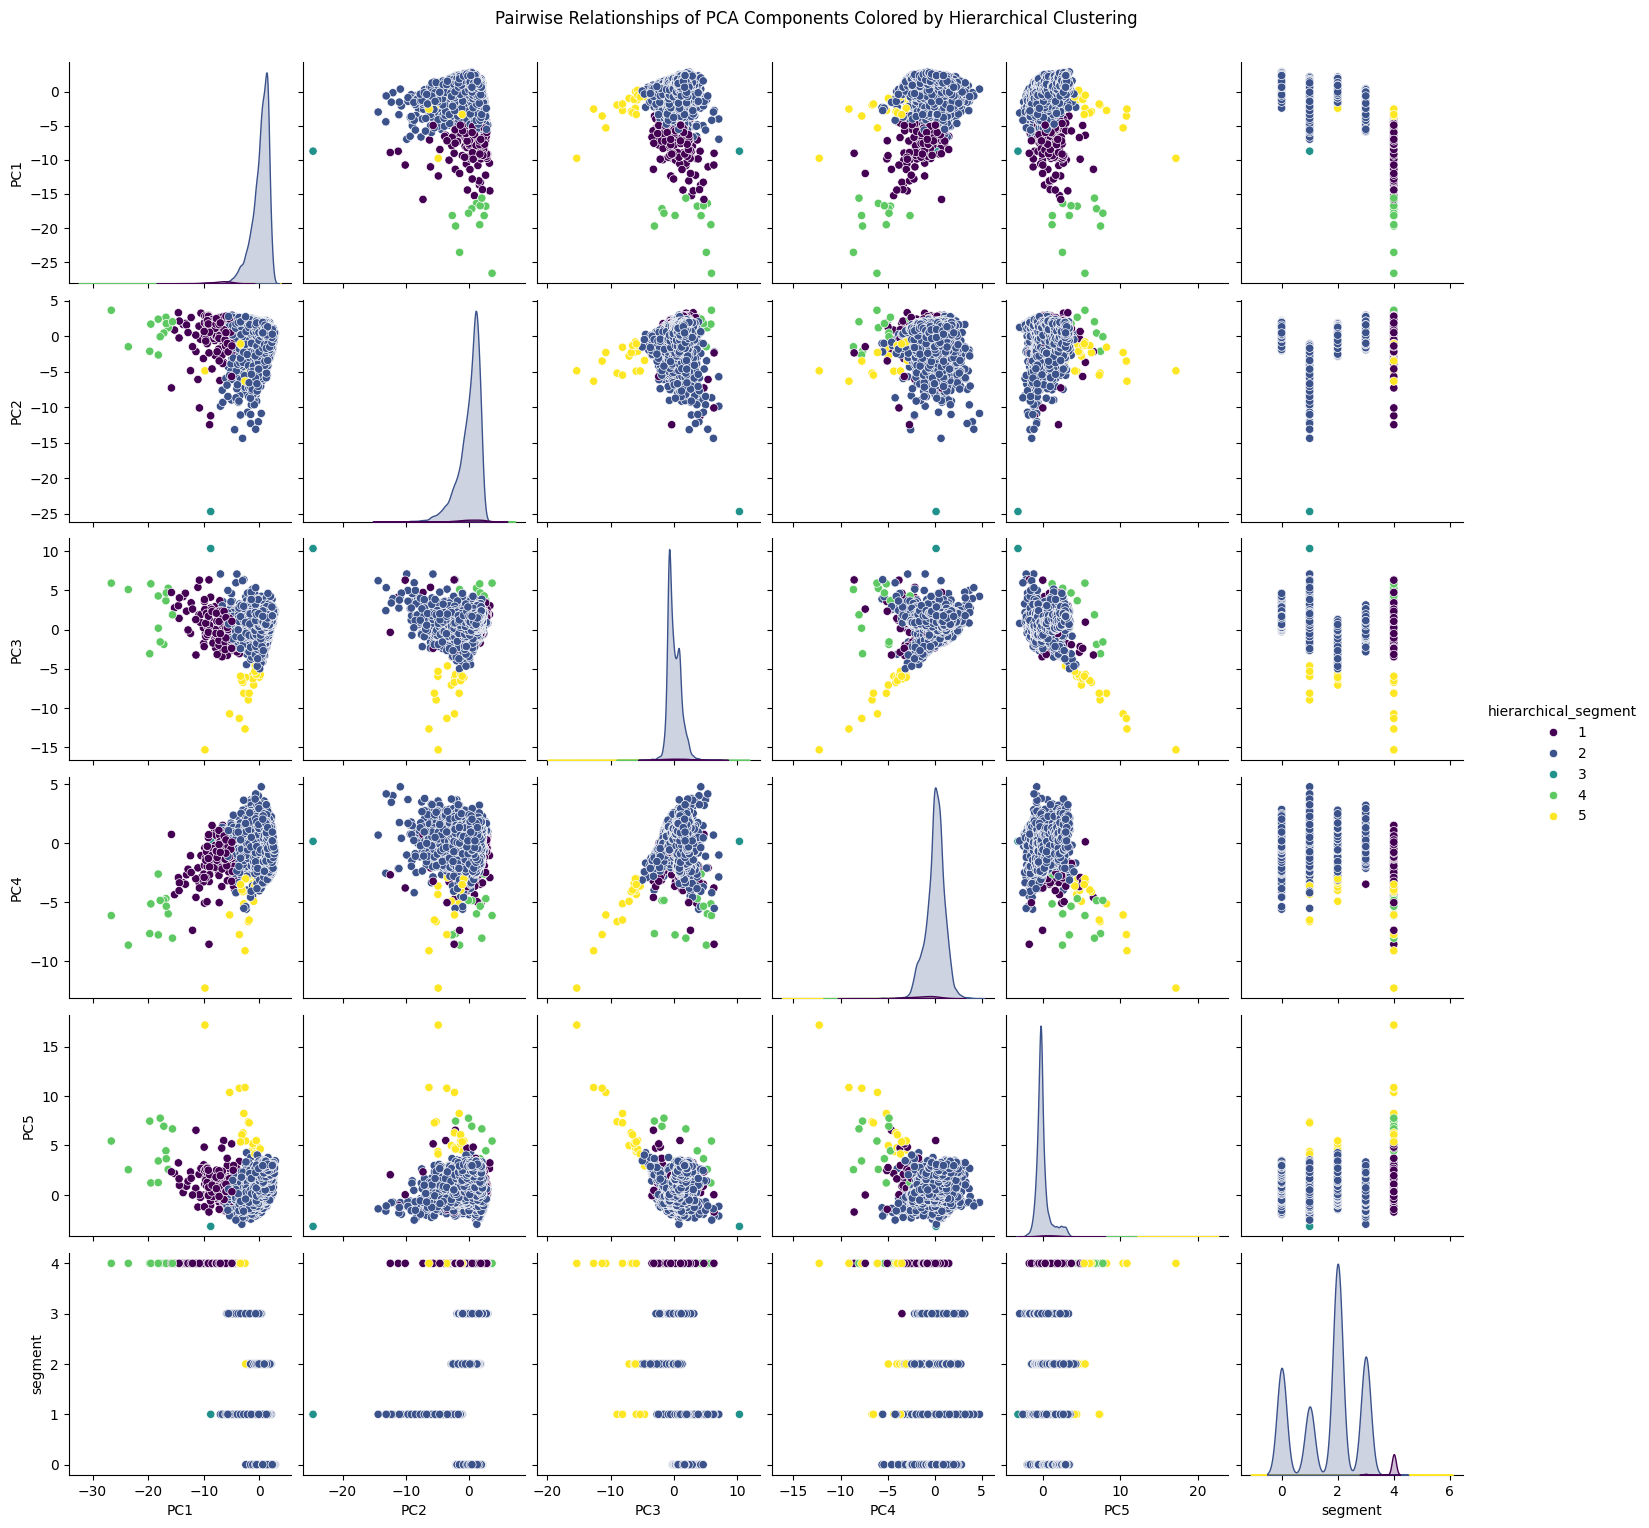

In [ ]:
threshold = 5
pca_df['hierarchical_segment'] = fcluster(linked, threshold, criterion='maxclust')

plt.figure(figsize=(12, 10))
sns.pairplot(pca_df, hue='hierarchical_segment', palette='viridis', markers='o', diag_kind='kde', height=2.5)
plt.suptitle('Pairwise Relationships of PCA Components Colored by Hierarchical Clustering', y=1.02)
plt.show()